In [1]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("C:/Users/MSI/Desktop/DL/Datasets/asl/sign_mnist_train/sign_mnist_train.csv")
valid_df = pd.read_csv("C:/Users/MSI/Desktop/DL/Datasets/asl/sign_mnist_test/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

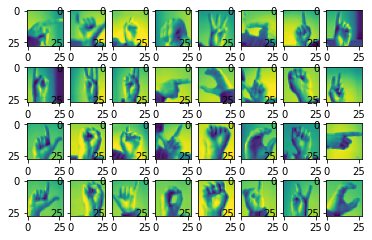

In [4]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [5]:
datagen.fit(x_train)

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(img_iter,
          epochs=10,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/10
857/857 [==============================] - 14s 12ms/step - loss: 1.1030 - accuracy: 0.6445 - val_loss: 0.3190 - val_accuracy: 0.8759
Epoch 2/10
857/857 [==============================] - 10s 11ms/step - loss: 0.3185 - accuracy: 0.8891 - val_loss: 0.6529 - val_accuracy: 0.7723
Epoch 3/10
857/857 [==============================] - 10s 11ms/step - loss: 0.2002 - accuracy: 0.9333 - val_loss: 0.9583 - val_accuracy: 0.7627
Epoch 4/10
857/857 [==============================] - 10s 11ms/step - loss: 0.1519 - accuracy: 0.9501 - val_loss: 0.1746 - val_accuracy: 0.9416
Epoch 5/10
857/857 [==============================] - 10s 11ms/step - loss: 0.1303 - accuracy: 0.9590 - val_loss: 0.1776 - val_accuracy: 0.9374
Epoch 6/10
857/857 [==============================] - 10s 12ms/step - loss: 0.1157 - accuracy: 0.9631 - val_loss: 0.4181 - val_accuracy: 0.8871
Epoch 7/10
857/857 [==============================] - 10s 12ms/step - loss: 0.1004 - accuracy: 0.9690 - val_loss: 0.0354 - val_accuracy:

In [8]:
model.save('asl_model')

INFO:tensorflow:Assets written to: asl_model\assets


In [9]:
model = keras.models.load_model('asl_model')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

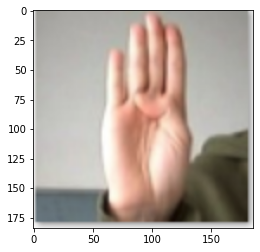

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')
show_image('C:/Users/MSI/Desktop/DL/Datasets/asl/b.png')

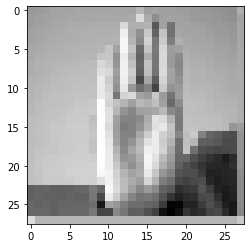

In [11]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image
image = load_and_scale_image('C:/Users/MSI/Desktop/DL/Datasets/asl/b.png')
plt.imshow(image, cmap='gray')

In [12]:
image = image_utils.img_to_array(image)
image = image.reshape(1,28,28,1)
image = image / 255

In [13]:
prediction = model.predict(image)
print(prediction)

[[7.6588202e-23 1.0000000e+00 1.5895915e-32 3.3188616e-25 2.2598305e-20
  4.9828236e-12 2.3022360e-31 4.0414399e-33 6.4114608e-12 4.1596007e-22
  1.7789076e-24 6.2140831e-27 3.0155382e-31 5.4839226e-37 6.1095328e-27
  1.5024920e-27 3.9923535e-29 9.9334221e-32 4.8070084e-32 3.4590481e-15
  3.8270255e-28 4.3456649e-12 4.0919661e-18 1.2812098e-26]]


In [14]:
import numpy as np
np.argmax(prediction)

1

In [15]:
alphabet = "abcdefghiklmnopqrstuvwxy"
alphabet[np.argmax(prediction)]

'b'

In [16]:
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1)
    image = image/255
    prediction = model.predict(image)
    # convert prediction to letter
    predicted_letter = alphabet[np.argmax(prediction)]
    return predicted_letter

'b'

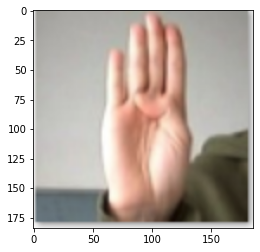

In [18]:
predict_letter("C:/Users/MSI/Desktop/DL/Datasets/asl/b.png")

'a'

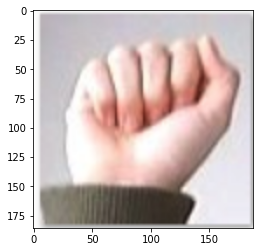

In [19]:
predict_letter("C:/Users/MSI/Desktop/DL/Datasets/asl/a.png")